In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib inline
plt.style.use('default')

### Fit the data set provided in the folder with an absorbed power-law spectrum and find the best fitting total NH and power-law index (the total NH= Milky Way_NH + intrinsic NH). 

#### Data from Morrison 

In [3]:
E_ranges = (0.030,0.1003),(0.100,0.284),(0.284,0.400),(0.400,0.532),(0.532,0.707),(0.707,0.867),(0.867,1.303),(1.303,1.840),(1.840,2.471),(2.471,3.210),(3.210,4.038),(4.038,7.111),(7.111,8.331),(8.331,10.000)


In [21]:
c0_arr = c0a,c0b,c0c,c0d,c0e,c0f,c0g,c0h,c0i,c0j,c0k,c0l,c0m,c0n=17.3,34.6,78.1,71.4,95.5,308.9,120.6,141.3,202.7,342.7,352.2,433.9 ,629.0 ,701.2


In [5]:
c1_arr = c1a,c1b,c1c,c1d,c1e,c1f,c1g,c1h,c1i,c1j,c1k,c1l,c1m,c1n =608.1, 267.9, 18.8, 66.8, 145.8, -380.6, 169.3, 146.8, 104.7, 18.7, 18.7, -2.4, 30.9, 25.2
 

In [20]:
c2_arr = c2a,c2b,c2c,c12d,c2e,c2f,c2g,c2h,c2i,c2j,c2k,c2l,c2m,c2n = -2150., -476.1, 4.3, -51.4, -61.1, 294.0, -47.7, -31.5,-17.0,0.0,0.0,0.7,50.0,0.0


#### Let certain energies correspond with certain values of C (i.e. table 2 Morrison) 

In [22]:
c0,c1,c2=[],[],[]

for j in range(0,len(E)):    
    for i in range(len(E_ranges)):
        if E_ranges[i][0] <= E[j] <= E_ranges[i][1]: 
            c0.append(c1_arr[i]) 
            c1.append(c2_arr[i])
            c2.append(c2_arr[i])

#### Data from Raf

In [18]:
df = pd.read_csv('spectrum-HW4.csv',usecols= ['E','E_err','data','y_err']) 
df.max() 

E = np.array(df['E']) 
y = np.array(df['data']) 
y_err=np.array(df['y_err'])
E_err=np.array(df['E_err'])
#df

## Fitting Raf's Data with "Broken Power Law" Using Data from Morrison Paper

### <span style="color:Blue"> 1. Not considering redshift 

####  Cross Section (i.e. Table 2 Caption)

In [9]:
def sigma(energy):
    sigma = ((c0 + c1*energy+ c2*energy**2)*energy**(-3))*10**(-24) #cross section 
    return sigma
sig = sigma(E)

#### Power Law $f(E) = KE^{-a} \times e^{-\sigma N_{H}}$ 

In [10]:
def func_powerlaw(E,K,a,N):
    return K*(E**(-a)) * (np.exp(-sig*N))


#### Fit Data 

In [11]:
target_func = func_powerlaw
popt, pcov = curve_fit(target_func, E, y,maxfev=2000)
print (popt)

[1.35384854e-04 5.38376986e-01 1.00000000e+00]


/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


#### Plot 

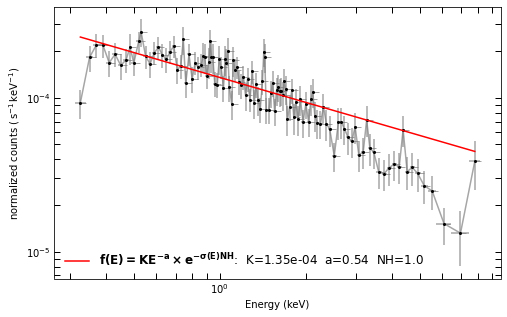

In [12]:
#plot of the data
df.plot.scatter(x='E',y='data',legend=False,color='black',s=4,figsize=(8,5))

#error
plt.errorbar(df['E'],df['data'],yerr=df['y_err'],xerr=df['E_err'],color='grey',zorder=0, marker=1,alpha=.7)

#plot of the fit
plt.plot(E, func_powerlaw(E, *popt),
label= (r'$\bf{f(E) = KE^{-a}\times e^{-\sigma(E) NH}}$:  K=' + "{:.2e}".format(popt[0])+ '  a='+ "{:.2}".format(popt[1]) +  r'  $\rm{NH}$=' + "{:.2}".format(popt[2])),
         color='red')

# *aesthetics*
plt.xlabel('Energy (keV)')
plt.ylabel(r'normalized counts ($\, \rm{s^{-1} \, keV^{-1}}$)')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower left',frameon=False,prop={'size': 12});
plt.tick_params(direction='in', length=6, width=1,right='on', top='on', which='both')


### <span style="color:red"> 2. Considering redshift (1+z) where z = 3

#### Cross Section (i.e. Morrison Table 2 Caption) 

In [13]:
def sigma_rs(energy):
    sigma_rs = ((c0 + c1*energy*4+(c2*energy*4)**2)*(energy*4)**(-3))*10**(-24) #cross section 
    return sigma_rs
sig_rs = sigma_rs(E)

#### Powerlaw $f(E) = KE^{-a} \times e^{-\sigma N_{H}} \times e^{-\sigma_{rs} (1+z) N_{H}}$ 

In [14]:
def func_powerlaw_rs(E,K,a,N):
    return K*(E**(-a)) * (np.exp(-sig*N)) + (np.exp(-sig_rs*N)) 

#### Fit data

In [40]:
target_func_rs = func_powerlaw_rs
popt_rs, pcov_rs = curve_fit(target_func_rs, E, y,maxfev=2000)
print (popt_rs)

[-9.99855629e-01 -7.29183038e-05  1.00000000e+00]


/Users/candicestauffer/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


#### Plot

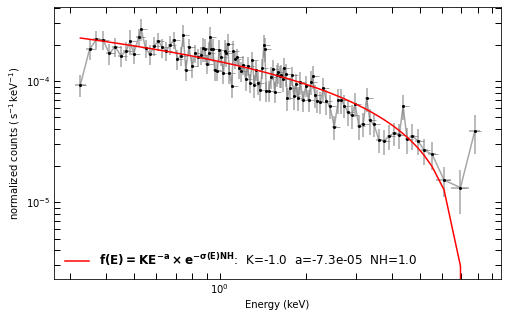

In [16]:
#plot of the data
df.plot.scatter(x='E',y='data',legend=False,color='black',s=4,figsize=(8,5))

#error
plt.errorbar(df['E'],df['data'],yerr=df['y_err'],xerr=df['E_err'],color='grey',zorder=0, marker=1,alpha=.7)

#plot of the fit
plt.plot(E, func_powerlaw_rs(E, *popt_rs),
label= (r'$\bf{f(E) = KE^{-a}\times e^{-\sigma(E) NH}}$:  K=' + "{:.2}".format(popt_rs[0])+ '  a='+ "{:.2}".format(popt_rs[1]) +  r'  $\rm{NH}$=' + "{:.2}".format(popt_rs[2])),
         color='red')

# *aesthetics*
plt.xlabel('Energy (keV)')
plt.ylabel(r'normalized counts ($\, \rm{s^{-1} \, keV^{-1}}$)')
plt.xscale('log')

plt.yscale('log')
plt.legend(loc='lower left',frameon=False,prop={'size': 12});
plt.tick_params(direction='in', length=6, width=1,right='on', top='on', which='both')

#### Energy, C values, and Cross Sections 

In [39]:
vals = {'$E_{Raf}$': E, '$c0_{Mor}$':c0,'$c1_{Mor}$':c1,'$c2_{Mor}$':c2, '$\sigma_{cs}$': sig, '$\sigma RS_{cs}$':sig_rs}
pd.DataFrame(vals)[::10] #every 10th point


,$E_{Raf}$,$c0_{Mor}$,$c1_{Mor}$,$c2_{Mor}$,$\sigma_{cs}$,$\sigma RS_{cs}$
0,0.325,18.8,4.3,4.3,6.015967e-22,2.532458e-23
10,0.520,66.8,-51.4,-51.4,1.861447e-22,1.265716e-21
20,0.710,-380.6,294.0,294.0,-6.609064e-23,3.045505e-20
30,0.885,169.3,-47.7,-47.7,1.294455e-22,6.427473e-22
40,1.030,169.3,-47.7,-47.7,6.366098e-23,5.518656e-22
50,1.190,169.3,-47.7,-47.7,2.669720e-23,4.774666e-22
60,1.410,146.8,-31.5,-31.5,1.418363e-23,1.757588e-22
70,1.620,146.8,-31.5,-31.5,3.081574e-24,1.529143e-22
80,1.880,104.7,-17.0,-17.0,1.904564e-24,3.837644e-23
90,2.305,104.7,-17.0,-17.0,-2.025588e-24,3.127851e-23


##### (b) Swift-XRT spectrum of a Gamma Ray Burst GRB081028. The coordinates are: RA=08 07 34.9 dec=+02 18 31.0. We will first assume that the source is at redshift z=0. What is the amount of intrinsic NH

(i.e. the NH component that is due to absorption outside the Milky Way -mostly due to absorption in the transient host galaxy-)?

(the total NH= Milky Way_NH + intrinsic NH)